# Loan Application Status Prediction

## Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 


# Features:

Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, Loan_Amount, Loan_Amount_Term,
Credit History, Property_Area

## Target:

Loan_Status

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As per observation:

1. The dataset has 614 rows and 13 columns.
2. Many null values in Gender, Married, Dependents, Self_Employed, Loan_Amount, Loan_Amount_Term, Credit History columns.
3. 'Loan_ID' column is unwanted column,which has no any corelation with target, now drop it.

In [5]:
df.drop(columns='Loan_ID',inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

# Now Seperate Object and Numeric (Int, Float) datatype for future process.

In [7]:
numeric_datatypes=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numeric_datatypes.append(i)
print(len(numeric_datatypes))
numeric_datatypes

5


['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [8]:
object_datatypes=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        object_datatypes.append(i)
print(len(object_datatypes))
object_datatypes  

7


['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

# Since the dataset has a lot of string vales. We will use the encoding techniques to convert the sring data to numerical data.

In [9]:
for i in df.columns:
    if df[i].dtypes == 'object':
        val=df[i].unique()
        nval=df[i].nunique()
        print(i , val , nval , "\n")

Gender ['Male' 'Female' nan] 2 

Married ['No' 'Yes' nan] 2 

Dependents ['0' '1' '2' '3+' nan] 4 

Education ['Graduate' 'Not Graduate'] 2 

Self_Employed ['No' 'Yes' nan] 2 

Property_Area ['Urban' 'Rural' 'Semiurban'] 3 

Loan_Status ['Y' 'N'] 2 



# Handle the Null values with different techniques

In [10]:
df.Gender = df.Gender.fillna(df.Gender.mode().iloc[0]) # 0 or ‘index’ : get mode of Gender column

In [11]:
df.Married = df.Married.fillna(df.Married.mode().iloc[0])

In [12]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes == 'object':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))
        
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,NaN,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1.0


## Handle the Null values in object columns with KNN Imputer techniques

In [14]:
#KNN Imputer will try to find the relation with other columns and impute the data according the related nearest neighbors.

from sklearn.impute import KNNImputer

knnimp = KNNImputer(n_neighbors=2)
df.Dependents = knnimp.fit_transform(df[['Married','Dependents']])
df.Self_Employed = knnimp.fit_transform(df[['Education','Self_Employed']])

## Handle the Null values in numeric columns using Interative Imputer Technique

In [15]:
#This method treat other columns (which does not have nulls) as features and train on them. Whereas treat null column as label.
#Finally it will predict the NAN data & impute it, its just like regression problem.

# Before importing Iterative Imputer, we need to enable it using below code
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

In [16]:
iterimp = IterativeImputer()
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.median())

In [17]:
df.Loan_Amount_Term = iterimp.fit_transform(df[['LoanAmount','Loan_Amount_Term']])

In [18]:
df.Credit_History = df.Credit_History.fillna(df.Credit_History.median())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 62.4 KB


As per observation,
1. Now all colunms in int or float types only.
2. No any null values in dataset.

# Data Visualization

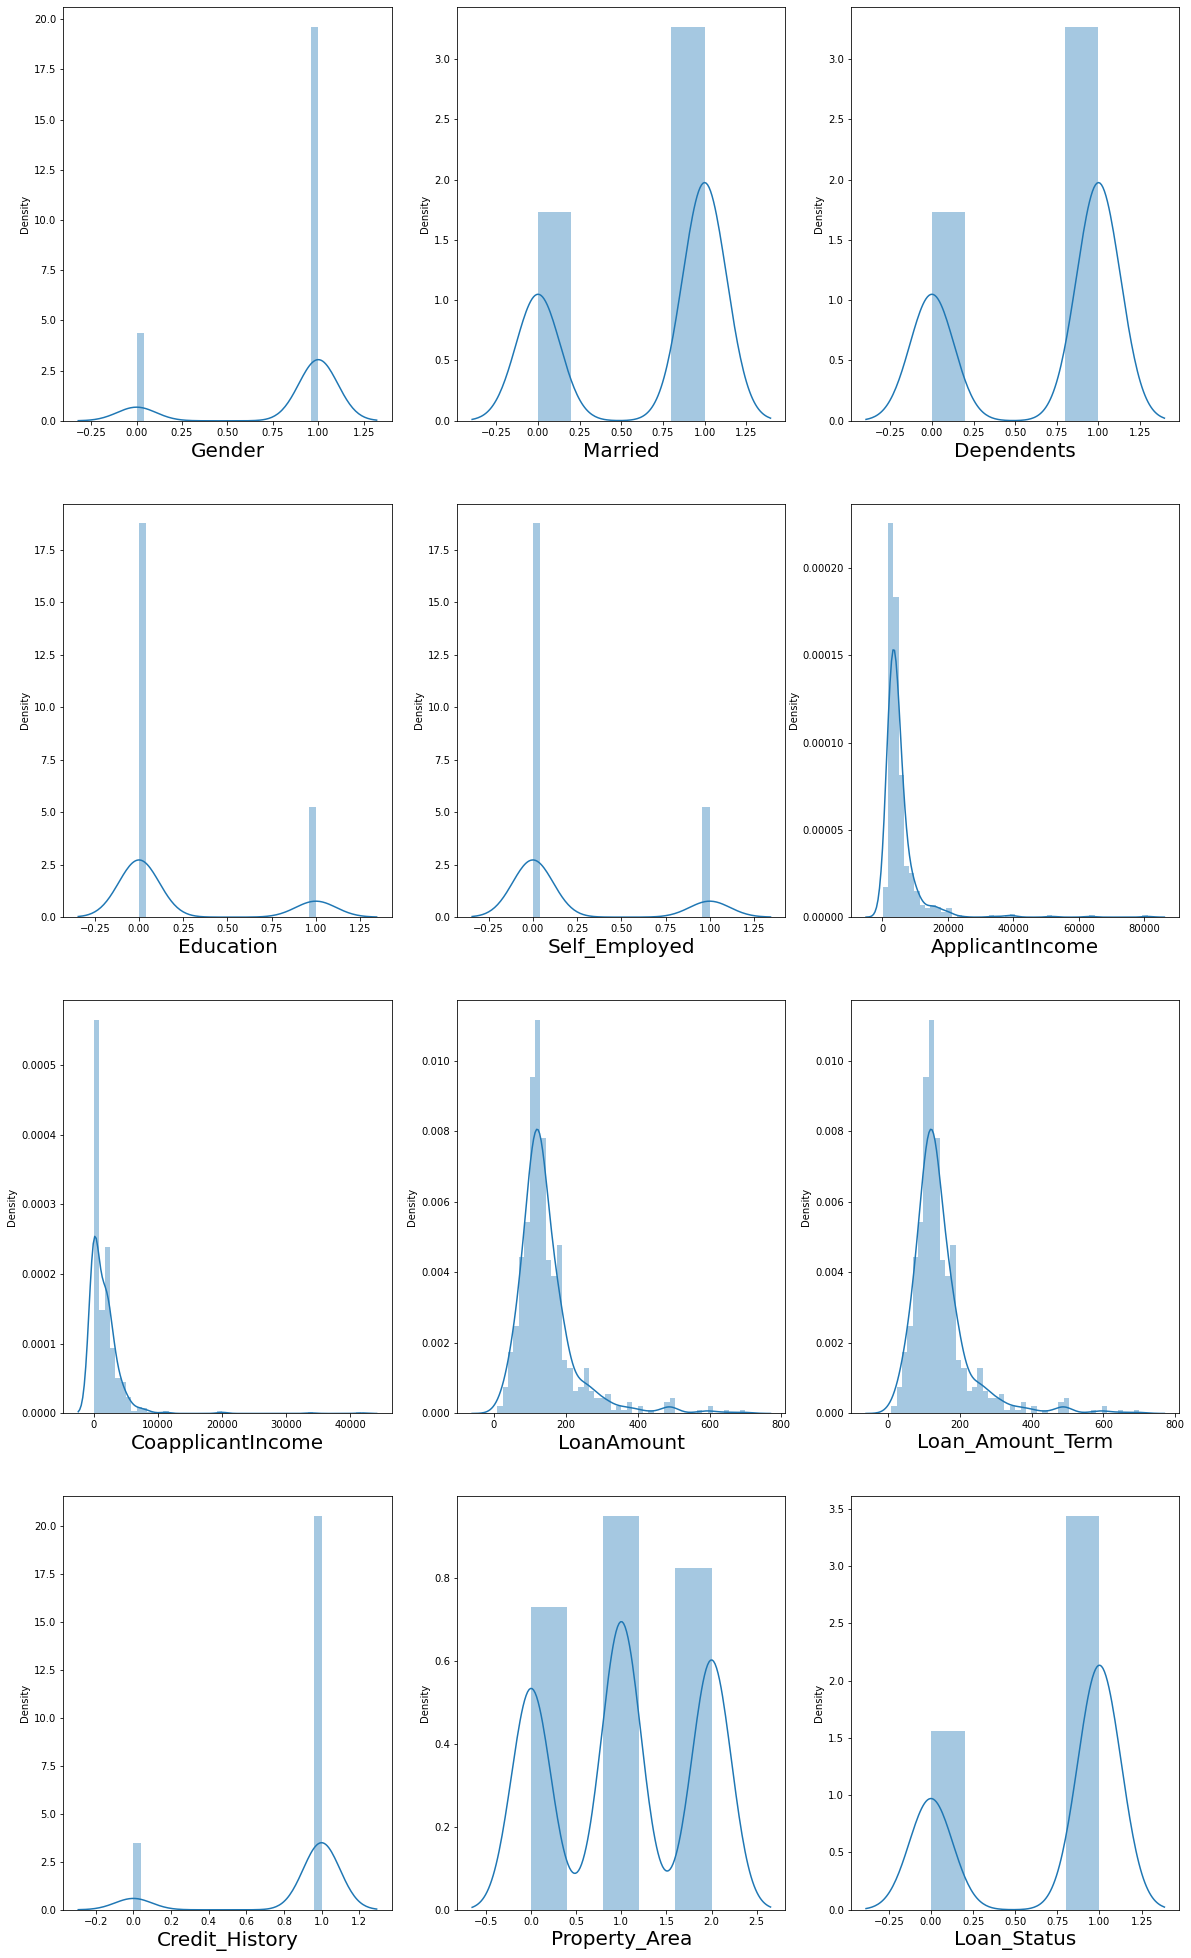

In [20]:
plt.figure (figsize=(20,35))
plotnumber = 1

for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)          
    plotnumber+=1
                     
plt.show()

As per observation,
1. ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History have skewed data.
2. Just ignore other columns becoze they are categorical columns.
3. Now check outlier in ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History columns.

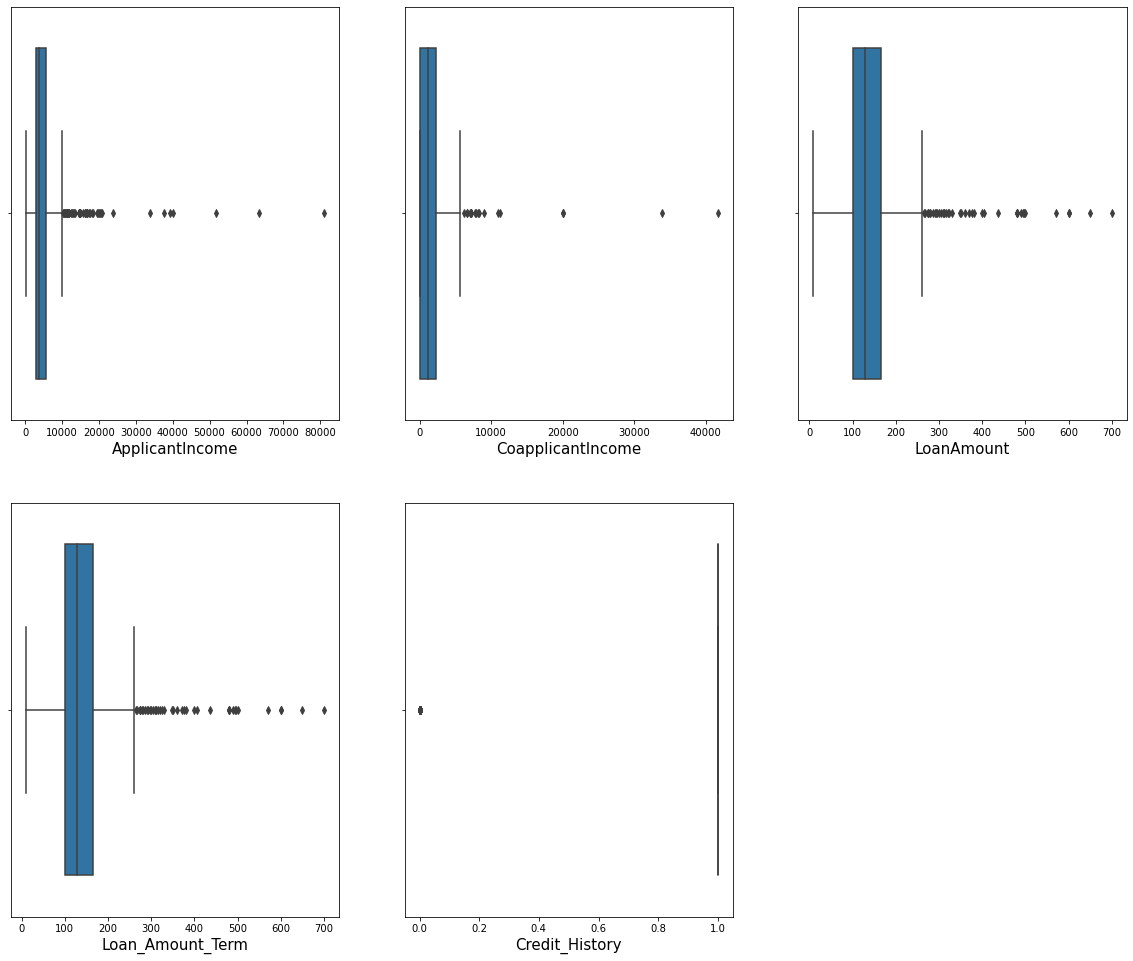

In [21]:
plt.figure (figsize=(20,35))
plotnumber = 1

for column in numeric_datatypes:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)          
    plotnumber+=1
        
plt.show()

In [22]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.653094,0.218241,0.218241,5403.459283,1621.245798,145.752443,145.752443,0.855049,1.037459,0.687296
std,0.386497,0.476373,0.476373,0.413389,0.413389,6109.041673,2926.248369,84.107233,84.107233,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,9.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,100.250000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,128.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,164.750000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,700.000000,1.000000,2.000000,1.000000


If mean value is grater than median (50%) value than the data is in right skewed. & 
If mean value is less than median (50%) value than the data is in left skewed.

From plosts and static describetiob,
The dataset is right skewed in ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History columns.

# Now Separting columns into features and target

In [23]:
x=df.drop(columns='Loan_Status')
y=df.Loan_Status
x.skew().sort_values()

Credit_History      -2.021971
Gender              -1.648795
Married             -0.644850
Dependents          -0.644850
Property_Area       -0.066196
Education            1.367622
Self_Employed        1.367622
LoanAmount           2.743053
Loan_Amount_Term     2.743053
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
dtype: float64

# Now use Transformation method to save our skewed data.

In [24]:
from sklearn.preprocessing import PowerTransformer

df_pt = PowerTransformer()
df_pw = pd.DataFrame(df_pt.fit_transform(x),columns=x.columns)
df_pw.skew().sort_values()

Credit_History      -2.021971
Gender              -1.648795
Married             -0.644850
Dependents          -0.644850
Property_Area       -0.158267
CoapplicantIncome   -0.145646
ApplicantIncome     -0.092946
LoanAmount           0.020831
Loan_Amount_Term     0.020831
Education            1.367622
Self_Employed        1.367622
dtype: float64

# Now remove remaining outliers using z-score technique.

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df_pw))
threshold=3
np.where(z>3)

(array([ 14,  14,  94,  94, 130, 130, 133, 133, 155, 155, 155, 171, 171,
        171, 185, 188, 216, 333, 369, 369, 409, 443, 468, 500, 555, 555,
        561, 561, 568, 568, 600], dtype=int64),
 array([7, 8, 7, 8, 7, 8, 7, 8, 5, 7, 8, 5, 7, 8, 5, 5, 5, 5, 7, 8, 5, 5,
        5, 5, 7, 8, 7, 8, 7, 8, 5], dtype=int64))

In [26]:
df_new= df[(z<3).all(axis=1)]

print('percentage of loss of data by zscore is :',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

percentage of loss of data by zscore is : 3.0944625407166124


Very less data, we have loss using z-tarnsformation method, let's proceed further.

In [27]:
df_new.Loan_Status.value_counts()

1.0    408
0.0    187
Name: Loan_Status, dtype: int64

It has been observed that our target 'Loan_Status' has an imbalance data. So, we’ll try to resample the data.

In [28]:
# Now seperating features and target.
x_new=df_new.drop(columns='Loan_Status')
y_new=df_new.Loan_Status

# SMOTE smapling

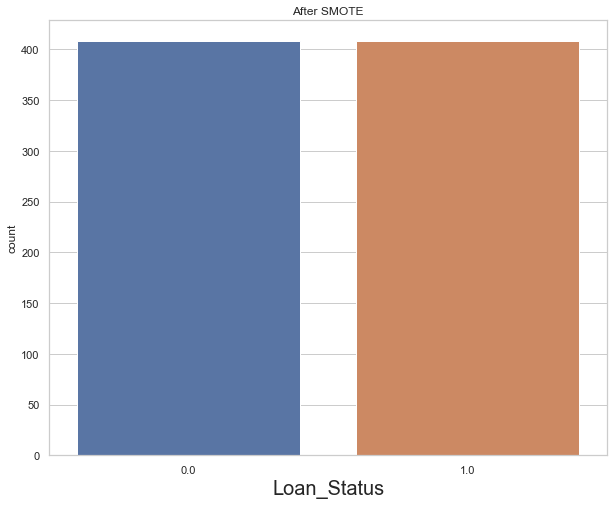

In [29]:
#Synthetic Minority Oversampling Technique (SMOTE)
#It is a statistical technique for increasing the number of cases in your dataset in a balanced way. 

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 'not majority', random_state = 29)
x_res, y_res = sm.fit_resample(x_new, y_new)
y_res_df = pd.DataFrame(y_res)

plt.figure(figsize=(10,8))

sns.set(style = 'whitegrid')
sns.countplot(y_res_df.Loan_Status).set_title('After SMOTE')
plt.xlabel('Loan_Status',fontsize=20)
plt.show()

In [30]:
x_res.shape

(816, 11)

In [31]:
y_res_df.shape

(816, 1)

# Data Scaling using Standard Scaler

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_res)
x_scaled

array([[ 0.48229214, -1.33853356, -1.33853356, ..., -0.22144114,
         0.5618146 ,  1.30608809],
       [ 0.48229214,  0.81027873,  0.81027873, ..., -0.22144114,
         0.5618146 , -1.33892533],
       [ 0.48229214,  0.81027873,  0.81027873, ..., -1.08270708,
         0.5618146 ,  1.30608809],
       ...,
       [ 0.48229214, -1.1528396 , -1.1528396 , ...,  2.42649775,
         0.5618146 , -1.33892533],
       [ 0.48229214,  0.81027873,  0.81027873, ...,  0.31529684,
         0.5618146 ,  0.39721355],
       [ 0.48229214,  0.81027873,  0.81027873, ..., -0.23160173,
         0.18608706,  1.11262372]])

In [33]:
XC=x_scaled

In [34]:
yc=y_res_df

# Model Development

In [35]:
#import the necessary model algos.

#classifiaction
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve

In [36]:
LC = LogisticRegression()
DTC = DecisionTreeClassifier()
KNNC= KNeighborsClassifier()
RFC = RandomForestClassifier()
SVc = SVC()
GRAC= GradientBoostingClassifier()
ADAC= AdaBoostClassifier()
GNBC= GaussianNB()
SGDC= SGDClassifier()
XGBC= XGBClassifier()

In [38]:
model=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(), SVC(),
       GradientBoostingClassifier(),AdaBoostClassifier(),GaussianNB(),SGDClassifier(),XGBClassifier()]

models=['LC=LogisticRegression','DTC=DecisionTreeClassifier','KNNC=KNeighborsClassifier','RFC=RandomForestClassifier',
        'SVc=SVC()','GRAC=GradientBoostingClassifier','ADAC=AdaBoostClassifier','GNBC=GaussianNB', 'SGDC=SGDClassifier()',
        'XGBC=XGBClassifier()']

acc_result=[]
train_result=[]

x_train,x_test,y_train,y_test=train_test_split(XC,yc,test_size=0.20,random_state=29)

for i in range(len(model)):
    clf=model[i]
    clf.fit(x_train,y_train)
    
    x_pred=clf.predict(x_train)
    y_pred=clf.predict(x_test)
    
    train_result.append(round (accuracy_score(y_train,x_pred)*100,2))
    acc_result.append(round (accuracy_score(y_pred,y_test)*100,2))

Result_df=pd.DataFrame({'Model Name':models, 'Training Score:':train_result ,'Accuracy Score (without tuning)':acc_result})
Result_df

,Model Name,Training Score:,Accuracy Score (without tuning)
0,LC=LogisticRegression,75.61,75.00
1,DTC=DecisionTreeClassifier,100.00,81.10
2,KNNC=KNeighborsClassifier,82.98,79.88
3,RFC=RandomForestClassifier,100.00,85.37
4,SVc=SVC(),79.29,76.83
5,GRAC=GradientBoostingClassifier,91.26,89.02
6,ADAC=AdaBoostClassifier,84.66,82.93
7,GNBC=GaussianNB,74.39,71.95
8,SGDC=SGDClassifier(),69.63,72.56
9,XGBC=XGBClassifier(),100.00,84.15


# 1. Logistic Regression:

In [39]:
acc_train=[]
acc_test=[]

for i in range (0,1000):
    x_train, x_test, y_train, y_test = train_test_split(XC, yc, test_size=0.20, random_state=i)
    
    lc = LogisticRegression()
    lc.fit(x_train,y_train)
    
    x_lc_predict=lc.predict(x_train)
    y_lc_predict=lc.predict(x_test)
    
    acc_train.append(accuracy_score(y_train,x_lc_predict))
    acc_test.append(accuracy_score(y_test,y_lc_predict))
    

acc_train_index= acc_train.index(max(acc_train))    
print("Index of max vaule of train's accuracy_score at random_state:",acc_train_index)

acc_test_index= acc_test.index(max(acc_test))
print("Index of max vaule of test's accuracy_score at random_state:",acc_test_index)

Index of max vaule of train's accuracy_score at random_state: 620
Index of max vaule of test's accuracy_score at random_state: 158


Always choose best training score for random_state, because
1. if training score >= testing score ==> chance of best fit or undetfit
2. if training score << testing score ==> overfit
3. if training score >> testing score ==> undetfit

In [40]:
kford_cv=KFold(n_splits=10,shuffle=False)
x_train, x_test, y_train, y_test = train_test_split(XC, yc, test_size=0.21, random_state=620)
    
lc.fit(x_train,y_train)
x_lc_predict=lc.predict(x_train)
y_lc_predict=lc.predict(x_test)
lc_cv = cross_val_score(lc,XC,yc,cv=kford_cv, scoring='accuracy')
    
print ("The training accurancy @ 620 random_state is:",accuracy_score(y_train,x_lc_predict))
print ("The testing accurancy @ 620 ranom_state is:",accuracy_score(y_test,y_lc_predict))
print ("Cross Validation: ", lc_cv.mean())
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_lc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_lc_predict))

The training accurancy @ 620 random_state is: 0.7701863354037267
The testing accurancy @ 620 ranom_state is: 0.6802325581395349
Cross Validation:  0.7153869316470942

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.82      0.43      0.57        83
         1.0       0.63      0.91      0.75        89

    accuracy                           0.68       172
   macro avg       0.73      0.67      0.66       172
weighted avg       0.72      0.68      0.66       172


 Conconfusion_matrix:
 [[36 47]
 [ 8 81]]


# 2. Decision Tree:

In [41]:
kford_val=KFold(n_splits=10)

grid_param = {
            'criterion':['gini','entropy'],
            'splitter':['best','random'],
            'max_features':['auto','sqrt','log2'],
            'max_depth': [10,20,30,40,50],
            'min_samples_leaf': range (2,6), 
            'min_samples_split': range (3,8),
            'max_leaf_nodes': range (5,10)} 
    
grid_search = GridSearchCV (DTC, param_grid = grid_param, cv=kford_val, n_jobs = -1)
# n_jobs : Use all the cores in your system. For performance improvement.
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8),
                         'splitter': ['best', 'random']})

In [42]:
#Initiate DecisitionTreeClassifier with new parametes and train
dtc=grid_search.best_estimator_

# Train the model
dtc.fit(x_train,y_train)

x_dtc_predict=dtc.predict(x_train)
y_dtc_predict=dtc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_dtc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_dtc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_dtc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_dtc_predict))

The training accurancy is: 0.827639751552795
The testing accurancy is: 0.7325581395348837

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.84      0.55      0.67        83
         1.0       0.68      0.90      0.78        89

    accuracy                           0.73       172
   macro avg       0.76      0.73      0.72       172
weighted avg       0.76      0.73      0.72       172


 Conconfusion_matrix:
 [[46 37]
 [ 9 80]]


# 3. K-Nearest Neighbour:

In [43]:
neighbors = [i for i in range(1,10)]
parameter_grid = { 'algorithm' : ['auto','ball_tree','kd_tree', 'brute'],
                   'weights':['uniform', 'distance'],
                   'leaf_size' : [3,5,6,7,8,10],
                   'n_neighbors': neighbors}
gridsearch = GridSearchCV(KNNC, param_grid=parameter_grid, cv=kford_val)
gridsearch.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8, 10],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']})

In [44]:
#Initiate KNN with new parametes and train
knnc=gridsearch.best_estimator_

# Train the model
knnc.fit(x_train,y_train)

x_knnc_predict=knnc.predict(x_train)
y_knnc_predict=knnc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_knnc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_knnc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_knnc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_knnc_predict))

The training accurancy is: 1.0
The testing accurancy is: 0.7383720930232558

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.78      0.64      0.70        83
         1.0       0.71      0.83      0.77        89

    accuracy                           0.74       172
   macro avg       0.75      0.74      0.73       172
weighted avg       0.74      0.74      0.74       172


 Conconfusion_matrix:
 [[53 30]
 [15 74]]


# 4. Random forest:

In [45]:
params = {  'n_estimators' : [10,50,100,200,],
            'criterion':['gini','entropy'],
            'max_depth': [10,15,45,80,], 
            'min_samples_leaf': [5,6],
            'min_samples_split': [10,11], 
            'max_leaf_nodes': range (5,10)}

gridsearch_rfc = GridSearchCV(RFC, param_grid=params,cv=kford_val, n_jobs = -1)
gridsearch_rfc.fit(x_train,y_train)


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 45, 80],
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': [5, 6],
                         'min_samples_split': [10, 11],
                         'n_estimators': [10, 50, 100, 200]})

In [46]:
#Initiate RandomForestClassifier with new parametes and train
rfc=gridsearch_rfc.best_estimator_

# Train the model
rfc.fit(x_train,y_train)

x_rfc_predict=rfc.predict(x_train)
y_rfc_predict=rfc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_rfc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_rfc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_rfc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_rfc_predict))

The training accurancy is: 0.8354037267080745
The testing accurancy is: 0.7674418604651163

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.91      0.58      0.71        83
         1.0       0.71      0.94      0.81        89

    accuracy                           0.77       172
   macro avg       0.81      0.76      0.76       172
weighted avg       0.80      0.77      0.76       172


 Conconfusion_matrix:
 [[48 35]
 [ 5 84]]


# 5. SVC

In [47]:
#Initiate RandomForestClassifier with new parametes and train
svc=SVC(gamma='auto')

# Train the model
svc.fit(x_train,y_train)

x_svc_predict=svc.predict(x_train)
y_svc_predict=svc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_svc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_svc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_svc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_svc_predict))

The training accurancy is: 0.8136645962732919
The testing accurancy is: 0.6569767441860465

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.74      0.45      0.56        83
         1.0       0.62      0.85      0.72        89

    accuracy                           0.66       172
   macro avg       0.68      0.65      0.64       172
weighted avg       0.68      0.66      0.64       172


 Conconfusion_matrix:
 [[37 46]
 [13 76]]


# 6. Gradient Boosting Classifier:

In [48]:
#Initiate RandomForestClassifier with new parametes and train
grac=GradientBoostingClassifier(learning_rate= 0.01)

# Train the model
grac.fit(x_train,y_train)

x_grac_predict=grac.predict(x_train)
y_grac_predict=grac.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_grac_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_grac_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_grac_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_grac_predict))

The training accurancy is: 0.8260869565217391
The testing accurancy is: 0.7441860465116279

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.91      0.52      0.66        83
         1.0       0.68      0.96      0.79        89

    accuracy                           0.74       172
   macro avg       0.80      0.74      0.73       172
weighted avg       0.79      0.74      0.73       172


 Conconfusion_matrix:
 [[43 40]
 [ 4 85]]


# 7 AdaBoost Classifier:

In [49]:
#Initiate RandomForestClassifier with new parametes and train
adac=AdaBoostClassifier(learning_rate= 0.01, base_estimator=RandomForestClassifier())

# Train the model
adac.fit(x_train,y_train)

x_adac_predict=adac.predict(x_train)
y_adac_predict=adac.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_adac_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_adac_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_adac_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_adac_predict))

The training accurancy is: 1.0
The testing accurancy is: 0.7965116279069767

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.86      0.69      0.77        83
         1.0       0.75      0.90      0.82        89

    accuracy                           0.80       172
   macro avg       0.81      0.79      0.79       172
weighted avg       0.81      0.80      0.79       172


 Conconfusion_matrix:
 [[57 26]
 [ 9 80]]


# 8 GaussianNB:

In [50]:
#Initiate RandomForestClassifier with new parametes and train
gnbc=GaussianNB()

# Train the model
gnbc.fit(x_train,y_train)

x_gnbc_predict=gnbc.predict(x_train)
y_gnbc_predict=gnbc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_gnbc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_gnbc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_gnbc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_gnbc_predict))

The training accurancy is: 0.7670807453416149
The testing accurancy is: 0.6686046511627907

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.86      0.37      0.52        83
         1.0       0.62      0.94      0.75        89

    accuracy                           0.67       172
   macro avg       0.74      0.66      0.63       172
weighted avg       0.74      0.67      0.64       172


 Conconfusion_matrix:
 [[31 52]
 [ 5 84]]


# 9 SGDClassifier:

In [51]:
#Initiate RandomForestClassifier with new parametes and train
sgdc=SGDClassifier(alpha=0.001)

# Train the model
sgdc.fit(x_train,y_train)

x_sgdc_predict=sgdc.predict(x_train)
y_sgdc_predict=sgdc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_sgdc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_sgdc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_sgdc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_sgdc_predict))

The training accurancy is: 0.7531055900621118
The testing accurancy is: 0.686046511627907

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.89      0.40      0.55        83
         1.0       0.63      0.96      0.76        89

    accuracy                           0.69       172
   macro avg       0.76      0.68      0.65       172
weighted avg       0.76      0.69      0.66       172


 Conconfusion_matrix:
 [[33 50]
 [ 4 85]]


# 10 XGBClassifier:

In [52]:
#Initiate RandomForestClassifier with new parametes and train
xgbc=XGBClassifier(n_estimators = 10, learning_rate = 1.5)

# Train the model
xgbc.fit(x_train,y_train)

x_xgbc_predict=xgbc.predict(x_train)
y_xgbc_predict=xgbc.predict(x_test)

print ("The training accurancy is:",accuracy_score(y_train,x_xgbc_predict))
print ("The testing accurancy is:",accuracy_score(y_test,y_xgbc_predict))
print ('\n  \n Test Classification Report \n', classification_report(y_test,y_xgbc_predict,digits=2))
print ("\n Conconfusion_matrix:\n",confusion_matrix(y_test,y_xgbc_predict))

The training accurancy is: 0.9953416149068323
The testing accurancy is: 0.7906976744186046

  
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.81      0.75      0.77        83
         1.0       0.78      0.83      0.80        89

    accuracy                           0.79       172
   macro avg       0.79      0.79      0.79       172
weighted avg       0.79      0.79      0.79       172


 Conconfusion_matrix:
 [[62 21]
 [15 74]]


In [53]:
Acc_Score_tun =[round (accuracy_score(y_test,y_lc_predict)*100,2),
                round (accuracy_score(y_test,y_dtc_predict)*100,2),
                round (accuracy_score(y_test,y_knnc_predict)*100,2),
                round (accuracy_score(y_test,y_rfc_predict)*100,2),
                round (accuracy_score(y_test,y_svc_predict)*100,2),
                round (accuracy_score(y_test,y_grac_predict)*100,2),
                round (accuracy_score(y_test,y_adac_predict)*100,2),
                round (accuracy_score(y_test,y_gnbc_predict)*100,2),
                round (accuracy_score(y_test,y_sgdc_predict)*100,2),
                round (accuracy_score(y_test,y_xgbc_predict)*100,2)]
LAS = pd.DataFrame({'Classifier':['lc= LogisticRegression()', 'dtc = DecisionTreeClassifier()',
                                 'knnc = KNeighborsClassifier()','rfc = RandomForestClassifier()','svc=SVC()',
                                 'grac = GradientBoostingClassifier()', 'adac=AdaBoostClassifier','gnbc=GaussianNB', 
                                  'sgdc=SGDClassifier()', 'xgbc=XGBClassifier()'], 
                                 
                                'Accuracy Score (with tuning)':Acc_Score_tun})
LAS

,Classifier,Accuracy Score (with tuning)
0,lc= LogisticRegression(),68.02
1,dtc = DecisionTreeClassifier(),73.26
2,knnc = KNeighborsClassifier(),73.84
3,rfc = RandomForestClassifier(),76.74
4,svc=SVC(),65.70
5,grac = GradientBoostingClassifier(),74.42
6,adac=AdaBoostClassifier,79.65
7,gnbc=GaussianNB,66.86
8,sgdc=SGDClassifier(),68.60
9,xgbc=XGBClassifier(),79.07


In [54]:
Loan_Application_Status= pd.concat([Result_df,LAS],axis=1)
Loan_Application_Status

,Model Name,Training Score:,Accuracy Score (without tuning),Classifier,Accuracy Score (with tuning)
0,LC=LogisticRegression,75.61,75.00,lc= LogisticRegression(),68.02
1,DTC=DecisionTreeClassifier,100.00,81.10,dtc = DecisionTreeClassifier(),73.26
2,KNNC=KNeighborsClassifier,82.98,79.88,knnc = KNeighborsClassifier(),73.84
3,RFC=RandomForestClassifier,100.00,85.37,rfc = RandomForestClassifier(),76.74
4,SVc=SVC(),79.29,76.83,svc=SVC(),65.70
5,GRAC=GradientBoostingClassifier,91.26,89.02,grac = GradientBoostingClassifier(),74.42
6,ADAC=AdaBoostClassifier,84.66,82.93,adac=AdaBoostClassifier,79.65
7,GNBC=GaussianNB,74.39,71.95,gnbc=GaussianNB,66.86
8,SGDC=SGDClassifier(),69.63,72.56,sgdc=SGDClassifier(),68.60
9,XGBC=XGBClassifier(),100.00,84.15,xgbc=XGBClassifier(),79.07


# We are gettig high model accuracy: 89.02% with GradientBoostingClassifier model without tuning, which shows model is performing exremely well, so we can save this model.

# Save the model using pickle

In [55]:
import pickle
pickle.dump(GRAC,open('LOAN_APPLICATION_STATUS','wb'))